# Regression Lines and Least Squares
In statistical modeling, **regression analysis** is a set of statistical processes for estimating the relationships between a dependent variable $y$ and one or more independent variables $x$. In this section we'll use an example data set (or measurements set) to explain the concept.

In this case have a set of weight measurements $w_{m}$ (dependent variables) related to the heights of a population sample (independent variables). Both data sets are collected into a column vector:

 $$\mathbf{H}=\begin{bmatrix}
h_{1}\\ 
h_{2}\\ 
...\\ 
h_{m}\\ 
\end{bmatrix}, \mathbf{W}=\begin{bmatrix}
w_{1}\\ 
w_{2}\\ 
...\\ 
w_{m}\\ 
\end{bmatrix}$$

Using the provided measurements, we'd like to find a general (analytical) relationship between the two variables variables height and weight in such a way we can predict, or at least estimate, the weight for every measured height.

In [1]:
from statistic import *
df = pd.read_csv('Data/HeightWeight.csv')
df

,Height (cm),Weight (kg)
0,151.765,47.825606
1,156.845,53.041914
2,163.830,62.992589
3,168.910,55.479971
4,165.100,54.487739
...,...,...
252,76.835,8.022908
253,145.415,31.127751
254,162.560,52.163080
255,71.120,8.051258


Here above you can see the content of the data set. The first column reports the height of each element of the measured population, while the second column reports the corresponding weight. In general, we define as $m$ the size of the dataset (or the number of measurements). In this case $m$ = 256. Here below the data are plotted for visual representation.

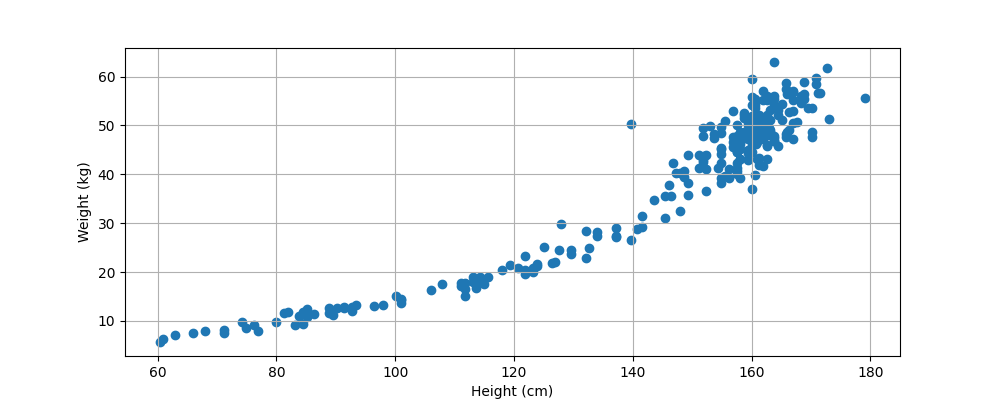

In [2]:
from statistic import *
%matplotlib widget

PlotHeightWeightDataSet(df)

## Regression Line
We'd like to desing an analytical model that is able to estimate the weight as continuous function of the height. In other words, we'd like to define a model function $ M\left ( h_i  \right ) $  so that it is a “good” predictor for the corresponding value of $w_i$ (regression). 

A **regression line** is defined as a statistical concept that allows to predict the relationship between two or more variables. It reflects the best-fit connection in a dataset between independent and dependent variables. The independent variable is generally shown on the X-axis and the dependent variable is shown on the Y-axis. The main purpose of developing a regression line is to predict or estimate the value of the dependent variable based on any value of the independent variable.

There are many different types of regression lines (linear, polynomial, exponential etc.), each of them depicting a different model but, in general, these don't pass throught all the points in the data set. The difference between each observed $w_i$ and each modeled $M\left ( h_i  \right )$ values is called **residual**.

<center><img src="Images/regressionLine.png" alt="Drawing" style="width: 650px;"/><center>






### Linear Regression
The most common form of regression is **linear regression**, where the function is expressed as linear combination of the independent variables. In the example case, we only have a single independent random variable and two unknown parameters $x_1$ and $x_2$, which are related by the following functional model:

#### $$ M\left ( h\right ) = x_1 + x_2 h$$

, so we are assuming there is a linear relationship between the height and the weight. By introducing this model, we're doing an error $e$ that we should consider to get the real value of the dependant variable (the weight):

 $$ w_{i} = M\left ( h_i\right )+  e_i = x_1 + x_2 h_i +  e_i   ,\quad i= \left [ 1, ..., m\right ]$$

The challenge consists in finding the values of those two parameters in such a way to minimize the overall error $\mathbf{e}$ which is introduced from the linear model assumption. In vectorial form, it can be written as:

$$\mathbf{W} = \begin{bmatrix}
w_{1}\\
w_{2}\\
...\\
w_{m}\\
\end{bmatrix} =  \begin{bmatrix}
1 & {h_{1}}\\ 
1 & {h_{2}}\\ 
... & ...\\ 
1 & {h_{m}}
\end{bmatrix} \begin{bmatrix}
x_1 & x_2\\ 
\end{bmatrix}+ \begin{bmatrix}
\epsilon_{1}\\
\epsilon_{2}\\
...\\
\epsilon_{m}\\
\end{bmatrix} = \mathbf{Hx} + \mathbf{e}$$

, where $\mathbf{W}$ is the **observation** (or **measurement**) vector (the measured weights), $H$ is the partial derivative matrix of the model respect to the parameters and $\mathbf{x}$ is the parameter (or **state**) vector (containing the unknowns to estimate).

## Cost Function

Since our objective is to get the best possible fit, a good idea would be to rank each possible straight line accordingly with its $ x_1 $ and $ x_2 $ value. The rank can be based on the average squared vertical distances of the scattered points from the line will be the least.



We'll use the function below as **cost function**:
#### $$  J\left ( x_1,x_2\right )=\frac{1}{2m}\sum_{i=1}^{m}\left ( M\left ( h_{i} \right )- w_i \right )^{^{2}} = \frac{1}{2m}\sum_{i=1}^{m} e ^{2}_i  $$
 
  We'd like to find the value of $ x_1 $ and $ x_2 $ that minimize it. In other words, We are trying to define a straight line which passes through the scattered data points representing our measurements and most closely fits the data. Ideally, if the line would pass through all the points of our training data set, the value of the cost function will be 0. 

Cost function value is:32.27


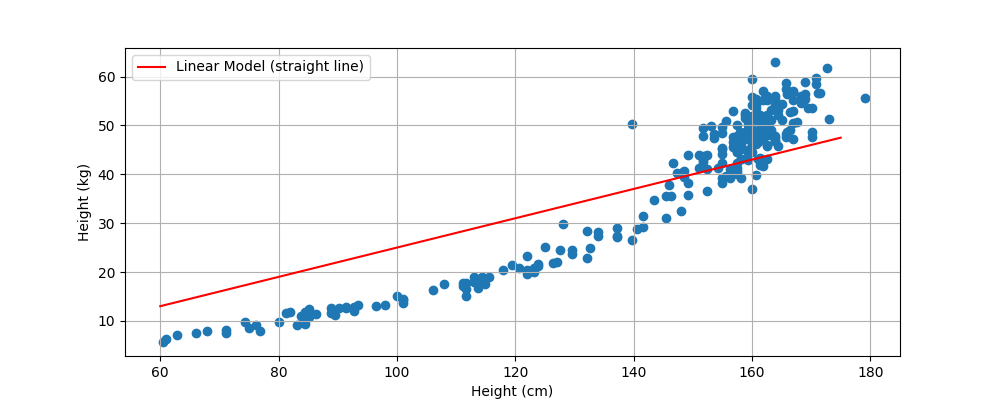

In [3]:
from statistic import *
%matplotlib widget

######## choose a value for a and b #########
x1 = -5
x2 = 0.3
#############################################

PlotLinearCostFunction(df, x1, x2)

As you can see, any change in the values of $ x_1 $ and $x_2 $ will change the value of the cost function. Obviously, the cost function $ J\left ( x_1,x_2 \right ) $ would be zero if the line would pass through all points.

The problem of finding the values of $ x_1 $ and $ x_2 $ that minimize the cost function $J$ can be solved both numerically (for example with a gradient descent algorithm) or using the **least squares** approach, that allows to calculate the states analytically. The main advantage of the latter approach is that we don't need to iterate a numerical process many times to get the result. We'll only discuss the least square approach because this is the one that is normally used in statistics.

## Least Squares Method

It can be demonstrated that, under the assumption that the residuals forming the vector $E$ are <u>randomly distributed with zero mean value</u> , the  state vector is:
    
### $$ \mathbf{x} = \left ( \mathbf{H}^{T}\mathbf{H} \right )^{^{-1}}\mathbf{H}^{T}\mathbf{W} $$

This is knonw as  **normal equation** and is typically used in the least squares approach. Let's see how to implement this process.

### Least Squares with Linear Model
From the previous example, we defined a linear model to describe how the heights and the weights are related each other:

$$ M\left ( h\right ) = x_1 + x_2 h$$

In vectorial form we have

$$\mathbf{M} =  \begin{bmatrix}
1 & {h_{1}}\\ 
1 & {h_{2}}\\ 
... & ...\\ 
1 & {h_{m}}
\end{bmatrix}  \begin{bmatrix}
x_1 & x_2\\ 
\end{bmatrix}  = \mathbf{Hx}$$ and $$ \mathbf{W} = \begin{bmatrix}
w_{1}\\
w_{2}\\
...\\
w_{m}\\
\end{bmatrix}$$

, where $h_i$ are the heights (independent variables). Replacing with the numbers in the provided example, we have:

$$\mathbf{H} =  \begin{bmatrix}
1 & {151.765}\\ 
1 & {156.845}\\ 
... & ...\\ 
1 & {158.750}
\end{bmatrix}$$ and $$ \mathbf{W} = \begin{bmatrix}
47.825606\\
53.041914\\
...\\
52.531624\\
\end{bmatrix}$$

By applying the normal equation, we can find the vector $\mathbf{x}$, which contains the parameters (or the state variables) which minimize the cost function.

Best x1 = -36.0257731567226
Best x2 = 0.5203167109342717
Cost function value is:12.06


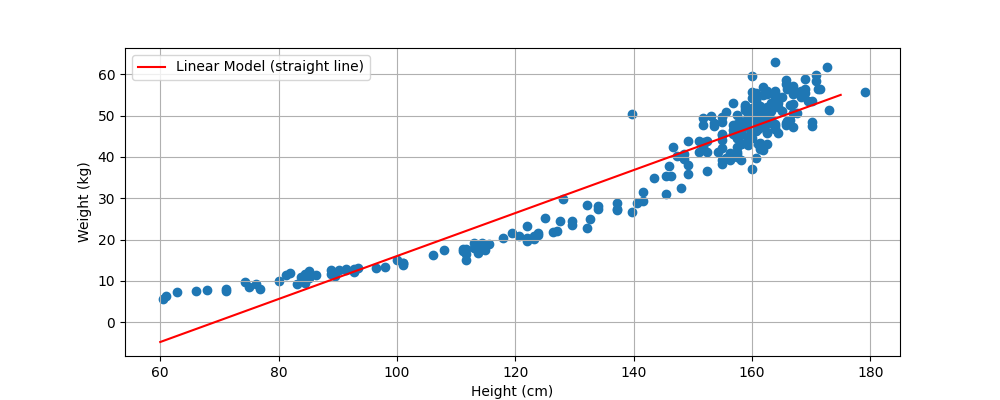

In [4]:
from statistic import *
%matplotlib widget

LinearLeastSquares(df)

### Last Squares with Quadratic Model

In this case we define a quadratic model to describe how the heights and the weights are related each other:

$$ M\left ( h \right ) = x_1 + x_2 h +  x_3 h^2 $$

In vectorial form we have

$$\mathbf{M} =  \begin{bmatrix}
1 & {h_{1}} & h_{1}^{2}\\ 
1 & {h_{2}} & h_{2}^{2}\\ 
... & ... & ...\\ 
1 & {h_{m}} & h_{m}^{2}
\end{bmatrix}  \begin{bmatrix}
x_1 & x_2 & x_3\\ 
\end{bmatrix} = \mathbf{Hx} $$

So, once we calculate $\mathbf{H}$, we can follow the same procedure highlighted above to find the $\mathbf{x}$ vector, which is composed by three elements this time.

Best x1 = 25.29610863899283
Best x2 = -0.5421473059838482
Best x3 = 0.004263058821951928
Cost function value is:7.18


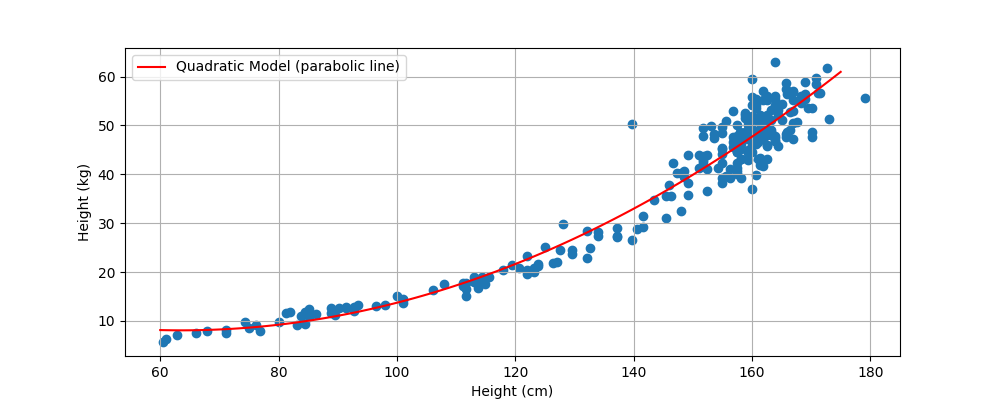

In [5]:
from statistic import *
%matplotlib widget

QuadraticLeastSquares(df)